In [168]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from mpl_toolkits.basemap import Basemap
from geopy.geocoders import Nominatim

data = 'C:/Users/Omar/Downloads/netflix_titles.csv'
df = pd.read_csv(data)


Data Cleaning TASK 1

In [169]:
for index, row in df.iterrows():
    if row['type'] == 'Movie':
        if 'min' not in str(row['duration']):
            df.at[index, 'duration'] = row['rating']
            df.at[index, 'rating'] = ""

    elif row['type'] == 'TV Show':
        if 'Season' not in str(row['duration']):
            df.at[index, 'duration'] = row['rating']
            df.at[index, 'rating'] = ""
df.to_csv('file_name.csv')


Data Transformation TASK 2

In [170]:

dftask2_1 = df.assign(country=df['country'].str.split(', ')).explode('country')
dftask2_1.count()



show_id         10845
type            10845
title           10845
director         7875
cast             9841
country         10014
date_added      10835
release_year    10845
rating          10841
duration        10845
listed_in       10845
description     10845
dtype: int64

In [171]:

dftask2_2 = df.assign(genre=df['listed_in'].str.split(', ')).explode('genre')
dftask2_2.count()


show_id         19323
type            19323
title           19323
director        13439
cast            17819
country         17601
date_added      19303
release_year    19323
rating          19317
duration        19323
listed_in       19323
description     19323
genre           19323
dtype: int64

 Data Aggregation & Visualization TASK 3

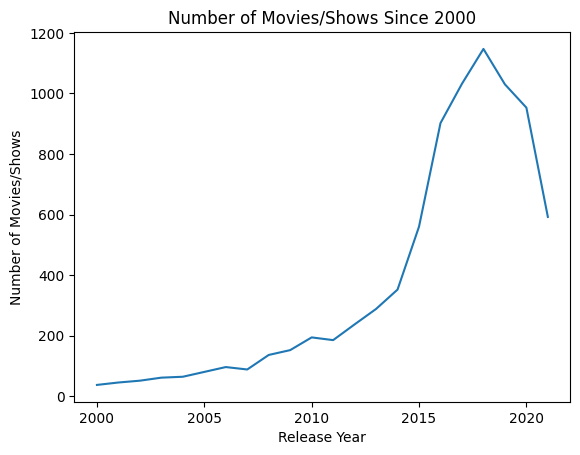

In [172]:
df_after2000 = df[df['release_year'] >= 2000]

count_by_year = df_after2000.groupby('release_year')['show_id'].count()

plt.plot(count_by_year.index, count_by_year.values)
plt.xlabel('Release Year')
plt.ylabel('Number of Movies/Shows')
plt.title('Number of Movies/Shows Since 2000')
plt.show()

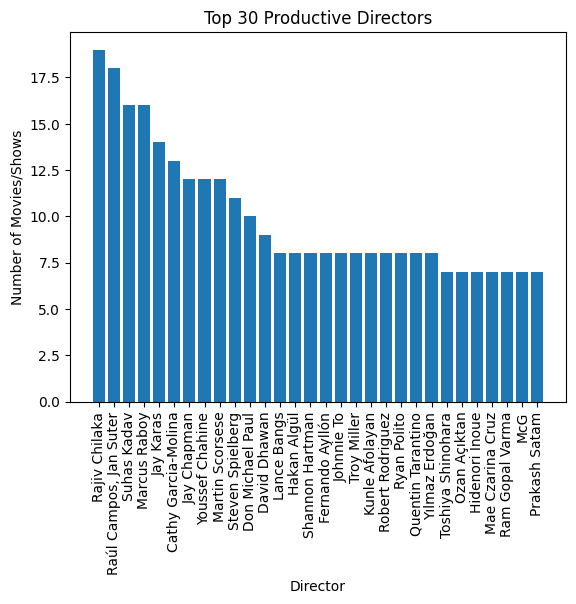

In [173]:
director_count = df.groupby('director')['show_id'].count()

director_count = director_count.sort_values(ascending=False)
top_30_directors = director_count[:30]

# Plot a barplot
plt.bar(top_30_directors.index, top_30_directors.values)
plt.xlabel('Director')
plt.ylabel('Number of Movies/Shows')
plt.title('Top 30 Productive Directors')
plt.xticks(rotation=90)
plt.show()

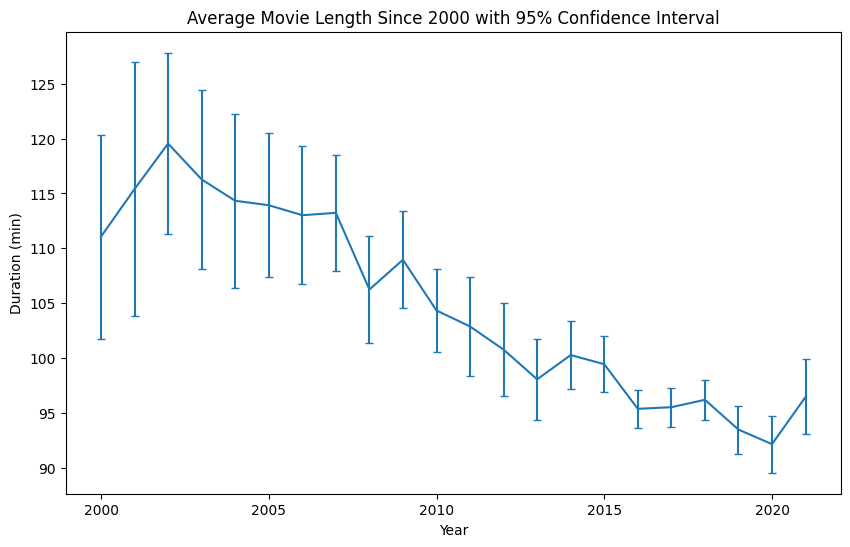

In [174]:
avg_mov_len = df[(df['type'] == 'Movie') & (df['release_year'] >= 2000)].copy()

avg_mov_len.loc[:, 'duration'] = avg_mov_len['duration'].str.replace(' min', '').astype(int)

movie_stats = avg_mov_len.groupby('release_year')['duration'].agg([np.mean, stats.sem])

movie_stats['error'] = movie_stats['sem'] * 1.96

fig, ax = plt.subplots(figsize=(10, 6))

sns.lineplot(data=movie_stats, x=movie_stats.index, y='mean', ax=ax)

plt.errorbar(x=movie_stats.index, y=movie_stats['mean'], yerr=movie_stats['error'], fmt='none', capsize=3)

ax.set_title('Average Movie Length Since 2000 with 95% Confidence Interval')
ax.set_xlabel('Year')
ax.set_ylabel('Duration (min)')

plt.show()


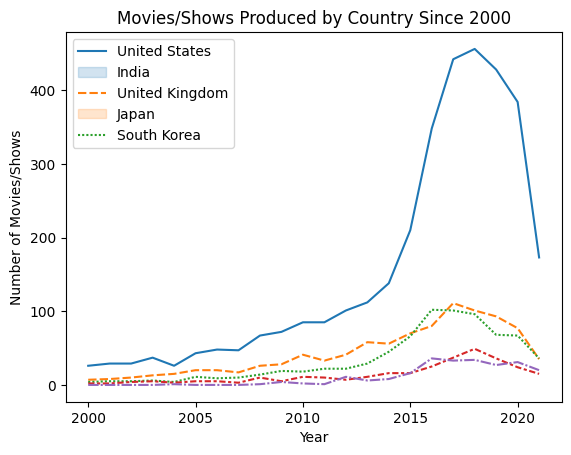

In [175]:
df_after2000 = dftask2_1[dftask2_1['release_year'] >= 2000]
countries = ['United States', 'India', 'United Kingdom', 'Japan', 'South Korea']
plot_data_list = []
for year in range(2000, 2022):
    row_data = {'year': year}
    for country in countries:
        count = df_after2000[(df_after2000['country'] == country) & (df_after2000['release_year'] == year)]['type'].count()
        row_data[country] = count
    plot_data_list.append(row_data)

plot_data = pd.DataFrame(plot_data_list)

plot_data.set_index('year', inplace=True)


sns.lineplot(data=plot_data)
plt.xlabel('Year')
plt.ylabel('Number of Movies/Shows')
plt.title('Movies/Shows Produced by Country Since 2000')
plt.legend(countries)
plt.show()


I am not sure if I should use the data from Tasks 2.1 or should I use the clean data. I did both just in case: 

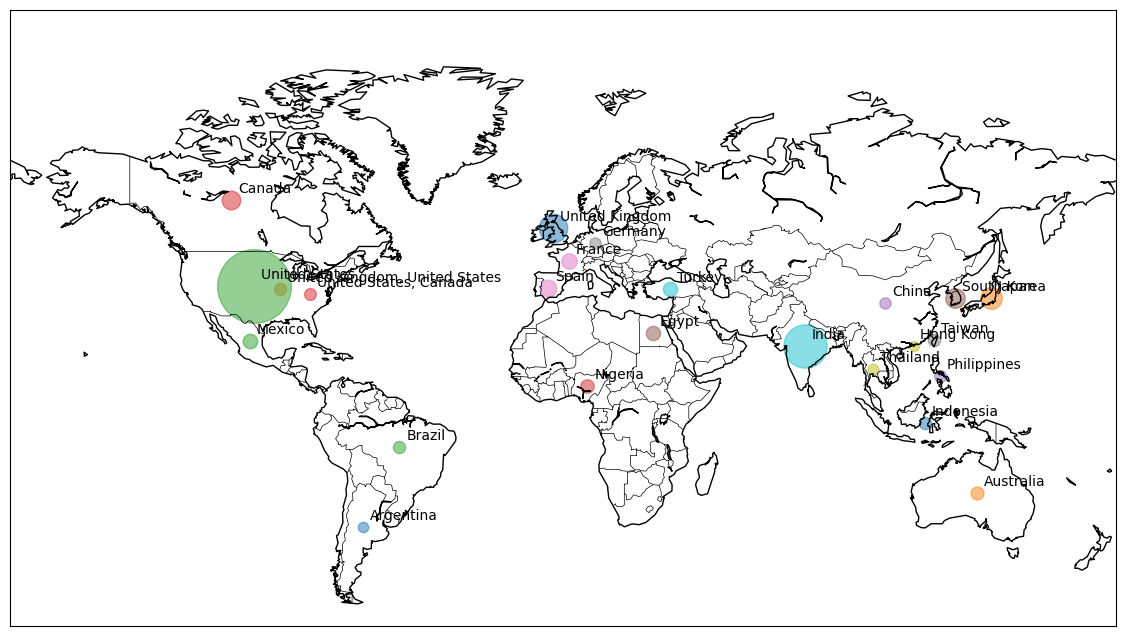

In [176]:
def get_latitude_longitude(country):
    geolocator = Nominatim(user_agent='myapp')
    location = geolocator.geocode(country)
    if location:
        return location.latitude, location.longitude
    else:
        return None, None
country_counts = df.groupby('country')['title'].count().reset_index(name='count')
country_counts.head()
popular_countries = country_counts[country_counts['count'] > 50]
fig = plt.figure(figsize=(16, 8))
m = Basemap(projection='mill', llcrnrlat=-60, urcrnrlat=90, llcrnrlon=-180, urcrnrlon=180, resolution='c')
m.drawcoastlines()
m.drawcountries()

for index, row in popular_countries.iterrows():
    country = row['country']
    count = row['count']
    latitudes ,longitudes= get_latitude_longitude(country)

    size = count 
    x, y = m(longitudes, latitudes)
    plt.scatter(x, y, s=size, alpha=0.5)
    plt.annotate(country, xy=(x, y), xytext=(5, 5), textcoords='offset points', fontsize=10)

plt.show()



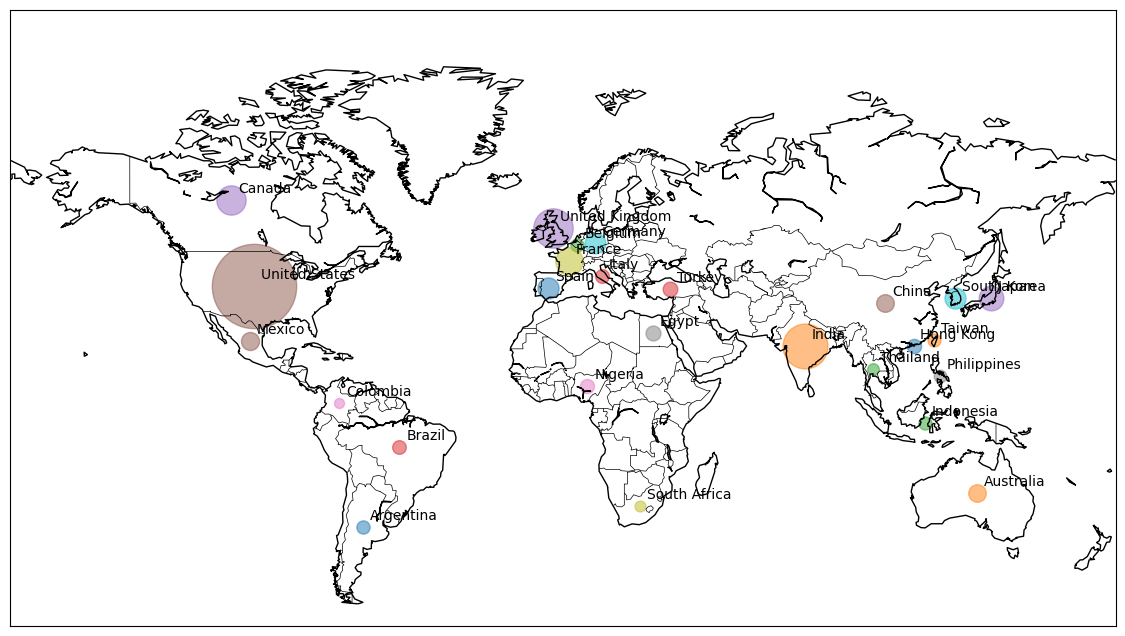

In [177]:
def get_latitude_longitude(country):
    geolocator = Nominatim(user_agent='myapp')
    location = geolocator.geocode(country)
    if location:
        return location.latitude, location.longitude
    else:
        return None, None
country_counts = dftask2_1.groupby('country')['title'].count().reset_index(name='count')
country_counts.head()
popular_countries = country_counts[country_counts['count'] > 50]
fig = plt.figure(figsize=(16, 8))
m = Basemap(projection='mill', llcrnrlat=-60, urcrnrlat=90, llcrnrlon=-180, urcrnrlon=180, resolution='c')
m.drawcoastlines()
m.drawcountries()

for index, row in popular_countries.iterrows():
    country = row['country']
    count = row['count']
    latitudes ,longitudes= get_latitude_longitude(country)

    size = count 
    x, y = m(longitudes, latitudes)
    plt.scatter(x, y, s=size, alpha=0.5)
    plt.annotate(country, xy=(x, y), xytext=(5, 5), textcoords='offset points', fontsize=10)

plt.show()

